### Air Passengers
- It is for learning Time Series Forecasting
- It is my first "Time Series Forecasting" Project.
- It considered here is just for trial and it will focus on coverage a breadth of topics and not making a very accurate forecast.


In [5]:
# import libaries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

### Data Loading & Basic Analysis Part

In [6]:
data=pd.read_csv("AirPassengers.csv",parse_dates=['Month'], index_col='Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


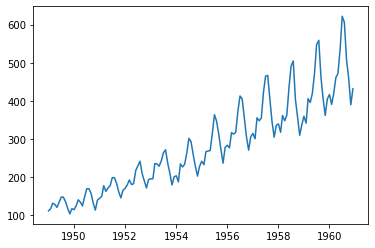

In [7]:
plt.plot(data)

### Checking Data is stationary or not
- Data is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- the followings should be constant over time:
  1. constant mean
  2. constant variance
  3. an autocovariance that does not depend on time
- There are 2 ways to check stationarity:
  1. Plotting Rolling Statistics:
      - We can plot the moving average or moving variance and see if it varies with time
  2. Dicky-Fuller Test:
      - This is one of the statistical tests for checking stationarity. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.

In [8]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rol1 = timeseries.rolling(12)
    rol2 = timeseries.rolling(12)
    rolmean=rol1.mean()
    rolstd=rol2.std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

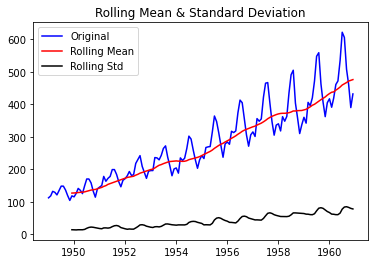

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
test_stationarity(data)

### How to make a Time Series Stationary

Eliminate the 1. Trends 2. Seasonality
#### Estimating & Eliminating Trends
One of the first tricks to reduce trend can be transformation. These can be taking a log, square root, cube root, etc.
There can be many ways of doing it and some of most commonly used are:
  1.  Aggregation – taking average for a time period like monthly/weekly averages
  2.  Smoothing – taking rolling averages
  3.  Polynomial Fitting – fit a regression model

#### Moving Average

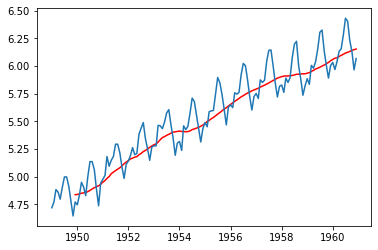

In [10]:
data_log=np.log(data)
a=data_log.rolling(12)
moving_avg=a.mean()
plt.plot(moving_avg,color="red")
plt.plot(data_log)

In [11]:
data_log_moving_avg_diff=data_log-moving_avg
data_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


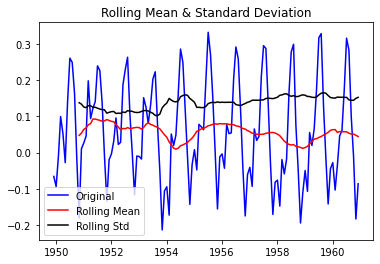

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [12]:
data_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(data_log_moving_avg_diff)

####  Exponentially Weighted Moving Average

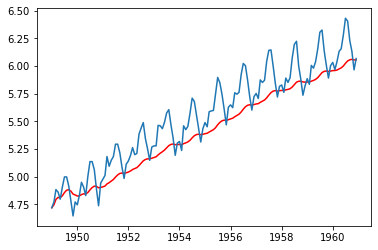

In [13]:
expwighted_avg = data_log.ewm(halflife=12).mean()
plt.plot(expwighted_avg,color="red")
plt.plot(data_log)

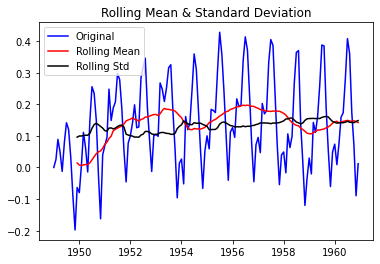

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
data_log_ewma_diff = data_log - expwighted_avg
test_stationarity(data_log_ewma_diff)

### Eliminating Trend and Seasonality
Let's discuss two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

#### Differencing
In this technique, we take the difference of the observation at a particular instant with that at the previous instant.

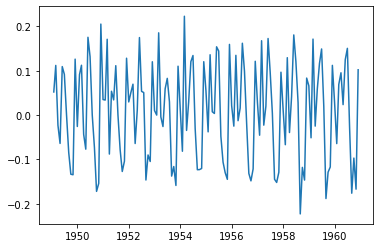

In [15]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)

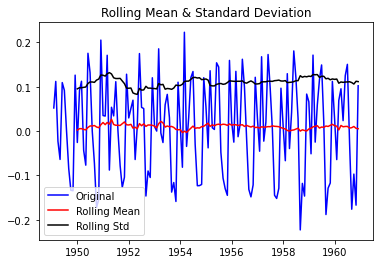

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [16]:
data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff)

#### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

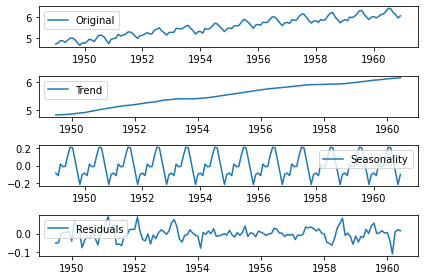

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

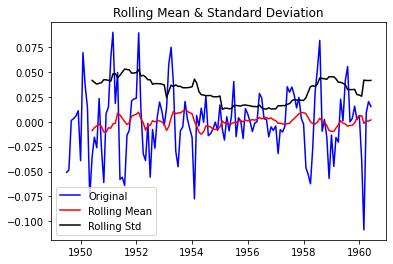

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [18]:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

### Forecasting a Time Series
I used ARIMA in this section .
The predictors depend on the parameters (p,d,q) of the ARIMA model:
1. Number of AR (Auto-Regressive) terms (p)
2. Number of MA (Moving Average) terms (q)
3. Number of Differences (d)

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

In [20]:
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


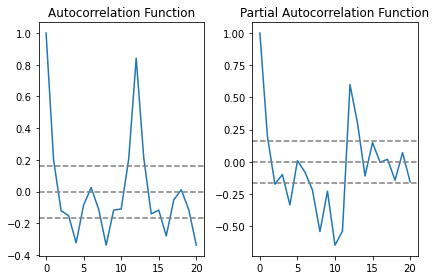

In [21]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

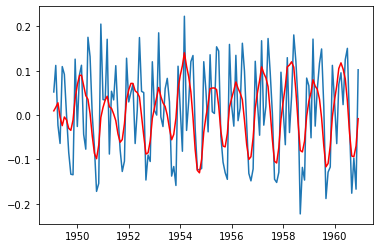

In [23]:
model = ARIMA(data_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

#### Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. 
1.  to store the predicted results as a separate series and observe it.
2. to convert the differencing to log scale an easy way to do it is to first determine the cumulative sum at index and then add it to the base number.
3. Last step is to take the exponent and compare with the original series.

In [24]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(data_log.iloc[0,0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078123
1949-03-01    115.073415
1949-04-01    118.301989
1949-05-01    117.768367
dtype: float64

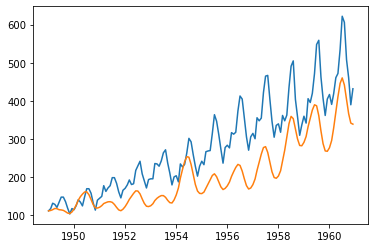

In [25]:

plt.plot(data)
plt.plot(predictions_ARIMA)